# Exploration Data Analysis pour explorer les modes de consomation 
### Par Alexandre Rocchi (pas toucher les loulous)



In [60]:
import pandas 
import ast
import matplotlib.pyplot as plt
import scipy
import seaborn as sb
import numpy as np


### Importation des Datasets et création de la table 

In [61]:

recipes = pandas.read_csv("../dataset/RAW_recipes.csv")
interactions = pandas.read_csv("../dataset/RAW_interactions.csv")

In [62]:
# Convertir les listes (considéré comme des strings, en liste python)

recipes['nutrition'] = recipes['nutrition'].apply(ast.literal_eval)

recipes['tags'] = recipes['tags'].apply(ast.literal_eval)

recipes['steps'] = recipes['steps'].apply(ast.literal_eval)

recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)


In [63]:
# Convertir les dates en 'datetype' python :
recipes['submitted'] = pandas.to_datetime(recipes['submitted'])

interactions['date'] = pandas.to_datetime(interactions['date'])

In [64]:
recipes.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13


In [65]:
interactions.head(3)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


df = pandas.merge(recipes, interactions)

Travaillons sur une masse de données plus faible pour la prise en main des données et des différentes tables

In [66]:
df = pandas.merge(recipes, interactions, left_on='id', right_on='recipe_id')


In [67]:
df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...


In [68]:

df_g = df.groupby(['recipe_id']).agg({
    'name':'first',
    'minutes':'first',
    'contributor_id':'first',
    'submitted':'first',
    'tags':'first',
    'nutrition':'first',
    'steps':'first',
    'n_steps':'first',
    'description':'first',
    'ingredients':'first',
    'n_ingredients':'first',
    'review': list,
    'date': list,
    'user_id': list,
    'rating': list
}).reset_index()

print(df_g.head(1))


   recipe_id                               name  minutes  contributor_id  \
0         38  low fat berry blue frozen dessert     1485            1533   

   submitted                                               tags  \
0 1999-08-09  [weeknight, time-to-make, course, preparation,...   

                                  nutrition  \
0  [170.9, 3.0, 120.0, 1.0, 6.0, 6.0, 12.0]   

                                               steps  n_steps  \
0  [toss 2 cups berries with sugar, let stand for...       13   

                                         description  \
0  this is yummy and low-fat, it always turns out...   

                                         ingredients  n_ingredients  \
0  [blueberries, granulated sugar, vanilla yogurt...              4   

                                              review  \
0  [Yummy, yummy, yummy! I am a big fan of fruit ...   

                                                date  \
0  [2008-02-13 00:00:00, 2009-01-15 00:00:00, 201...   

    

In [69]:
df_g.dtypes

recipe_id                  int64
name                      object
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
steps                     object
n_steps                    int64
description               object
ingredients               object
n_ingredients              int64
review                    object
date                      object
user_id                   object
rating                    object
dtype: object

In [70]:
print("Nombre de valeurs manquantes :", df_g.isna().sum().sum())

Nombre de valeurs manquantes : 4980


Listes des variables et leur type :

| recipe_id | minutes | contributor_id | submitted | tags | steps | n_steps | description | ingredients | n_ingredients | review | date | user_id | rating |
| :-------: | :-----: | :------------: | :-------: | :--: | :---: | :-----: | :---------: | :---------: | :-----------: | :----: | :--: | :-----: | :----: |
| qualitative nominale | quantitative discrete | qualitative nominale | quantitative continue | qualitative nominale | qualitative nominale | quantitative discrete | qualitative nominale | qualitative nominale | quantitative discrete | qualitative nominale | quantitative continue | qualitative nominale |  qualitative ordinale |

### Analyse Univariés

Commencons par l'analyse univariés de chaque variables, commencons par les variables de type Quantitatives discrete 

Les différentes colonnes Quantitatives discrète : *minutes, n_steps, n_ingredients*

In [71]:
df_g['contributor_id'] = df_g.contributor_id.astype('category')
df_g['recipe_id'] = df_g.recipe_id.astype('category')

In [72]:
print(df_g.describe())

print(f"\nNombre de recettes : ",df_g['recipe_id'].count())

            minutes                      submitted        n_steps  \
count  2.316370e+05                         231637  231637.000000   
mean   9.398546e+03  2006-11-14 01:58:34.925508608       9.765499   
min    0.000000e+00            1999-08-06 00:00:00       0.000000   
25%    2.000000e+01            2004-09-16 00:00:00       6.000000   
50%    4.000000e+01            2007-01-23 00:00:00       9.000000   
75%    6.500000e+01            2008-10-29 00:00:00      12.000000   
max    2.147484e+09            2018-12-04 00:00:00     145.000000   
std    4.461963e+06                            NaN       5.995128   

       n_ingredients  
count  231637.000000  
mean        9.051153  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  
std         3.734796  

Nombre de recettes :  231637


##### Colonne : *minutes*

In [73]:
df_g  = df_g.sort_values('minutes',ascending=False)
df_g[['name','minutes']].head(5)


,name,minutes
141904,no bake granola balls,2147483647
213797,how to preserve a husband,1051200
155593,homemade fruit liquers,288000
120304,celtic druid s honey mead meade metheglin,259260
207668,homemade vanilla,259205


Les deux premières dates semblent etres des outlayers de recettes 'trolls' : nous les retirons donc du dataset. 

In [74]:
df_g = df_g.drop(df_g['minutes'].nlargest(2).index)

df_g[['name','minutes']].head(5)

,name,minutes
155593,homemade fruit liquers,288000
120304,celtic druid s honey mead meade metheglin,259260
207668,homemade vanilla,259205
57271,peach brandy,216015
40504,angelica liqueur,201610


In [75]:
df_g  = df_g.sort_values('minutes',ascending=True)
df_g[['name','minutes']].head(5)

,name,minutes
1831,tuna macaroni casserole siciliana,0
480,mushroom torte,0
481,char siu pork,0
482,amish biscuits,0
466,golden peanut bars,0


In [76]:

#idx = df_g.index[(df_g['minutes'] == df_g['minutes'].min())].tolist()
idx = df_g.index[df_g['minutes'] < 2].tolist()

df_g = df_g.drop(idx)


df_g[['name','minutes']].head(10)

,name,minutes
152553,coffee bbq squealin good wake me up java rub,2
224637,pirate punch,2
13172,rice croquettes,2
100204,kate s afternoon wine cooler zwt france,2
150197,romeo and juliet cheese and jam,2
136747,my special chili powder,2
225428,easy and fun brownie in a mug,2
193745,citrus tahini,2
18908,easy strawberry banana smoothie,2
33252,dairy free and delicious hot cocoa,2


In [77]:
df_g.describe()

,minutes,submitted,n_steps,n_ingredients
count,229999.000000,229999,229999.000000,229999.000000
mean,123.981465,2006-11-25 11:33:48.827951872,9.777851,9.063248
min,2.000000,1999-08-06 00:00:00,0.000000,1.000000
25%,20.000000,2004-10-05 00:00:00,6.000000,6.000000
50%,40.000000,2007-01-30 00:00:00,9.000000,9.000000
75%,65.000000,2008-11-02 00:00:00,12.000000,11.000000
max,288000.000000,2018-12-04 00:00:00,145.000000,43.000000
std,1984.762272,NaN,5.990552,3.730813


Tentons de representer la distributions des minutes dans un Violin Plot

Text(0, 0.5, 'Log minutes')

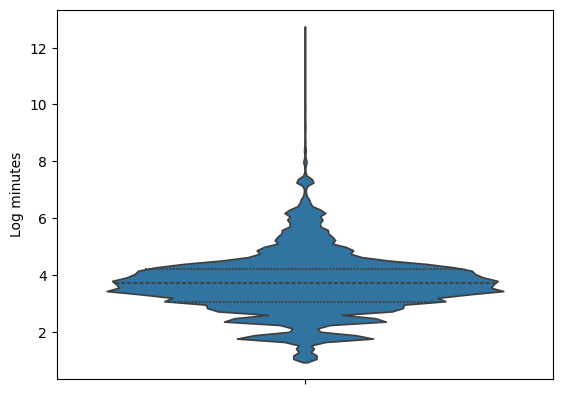

In [78]:
plt.figure()
sb.violinplot(np.log(1+df_g['minutes']),inner='quartile')
plt.ylabel('Log minutes')

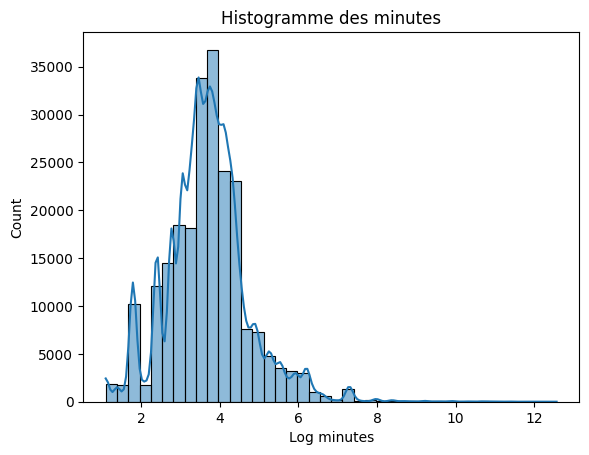

In [79]:
plt.figure()
sb.histplot(np.log(1+df_g['minutes']), kde=True, bins=40)
plt.title("Histogramme des minutes")
plt.xlabel('Log minutes')
plt.show()


In [80]:
skewness_minutes = scipy.stats.skew(df_g['minutes'])
kurt_minutes = scipy.stats.kurtosis(df_g['minutes'])

print(f'Skewness: {skewness_minutes}')
print(f'Kurtosis: {kurt_minutes}')


Skewness: 77.75383089002342
Kurtosis: 7830.45043221403


On retrouve une skewness et un Kurtosis elevé mais ceci est du a la présence d'outliers important. 

Skewness > 0 : La distribution est asymétrique avec une masse importante à gauche
Kurtnosis > 3 : Valeurs très proche de la moyenne mais des outliers important

Doit on les retirés et donc pas considèré les modes sur les alcools ? 

##### Colonne : *n_steps*

Verifier les valeurs max :

In [81]:
df_g  = df_g.sort_values('n_steps',ascending=False)
df_g[['name','n_steps','steps']].head(10)

,name,n_steps,steps
90562,easy yeast bread with variations,145,"[white bread:, lightly spooning flour into mea..."
108600,chocolate raspberry mousse truffle cake rasp...,113,"[make the chocolate sour cream cake:, preheat ..."
89963,chocolate raspberry ruffle cake,110,[first of all: these are not typical direction...
37274,5 cheese crab lasagna with roasted garlic and ...,108,[roast garlic: place oven rack on second notch...
182584,death by chocolate a la trellis,100,"[take a deep breath, make sure that you will h..."
231622,vampire s kiss cake,98,"[make your batter, preheat your oven to 350c p..."
114718,universal muffins mix,97,"[combine ingredients and break up any lumps, s..."
215548,best authentic mexican tamales ever,93,"[cook and shred pork roast:, start with 1 pork..."
37493,carioca,90,[for the genoise: preheat the oven to 350 degr...
152530,classic pumpkin pie for expats,88,[this recipe is involved and could take a good...


In [82]:
df_g['steps'].iloc[0]

['white bread:',
 'lightly spooning flour into measuring cup & leveling off , measure out 2 1 / 2 cups flour',
 'combine flour , dry yeast , sugar , & salt in a large mixer bowl',
 'blend',
 'in a medium saucepan , combine water , milk , and oil',
 'heat until very warm',
 'add eggs and liquid to flour mixture',
 'mixing - blend at low speed until moistened',
 'beat 3 minutes at medium speed',
 'with a wooden spoon , stir in an additional 3 to 3-1 / 2 cups of flour to form a sticky dough',
 'in bowl or on a floured board , gradually work in 1 / 2 to 1-1 / 2 cups more flour , kneading or working in with hands until dough is smooth , pliable and no longer sticky',
 'rising - place dough in a greased bowl',
 'cover with a cloth or loose fit lid',
 'let rise in a warm place until light and double in size , about 45 minutes',
 'shaping & baking:punch down dough to remove air bubbles',
 'divide dough into two parts',
 'from dough into desired shapes',
 'place in greased pans according to sha

Verifier les valeurs min : 

In [83]:
df_g  = df_g.sort_values('n_steps',ascending=True)
df_g[['name','n_steps','steps']].head(10)

,name,n_steps,steps
100335,all season bread,0,[]
69412,cauliflower salad made like potato salad lo...,1,[combine ingredients and chill before serving]
182121,turmeric broth for sipping,1,[put all in a pan and heat over med low heat u...
219378,easy fat free french onion dip,1,"[mix all ingredients together , cover and chil..."
209406,chocolate coconut milkshake,1,[place all in vitalmix blender and blend until...
162267,cranberry kir champagne cocktail,1,"[combine 1st 3 ingredients in a glass , top wi..."
85614,baileys eggnog,1,[combine all ingredients together with ice int...
48816,hamburger spread,1,[mix together and spread on hamburger buns]
214808,pink orange sunrise smoothie,1,[blend all ingredients until smooth]
45821,waldorf astoria beef stew,1,[throw this all together in a large dutch oven...


In [84]:
df_g = df_g.drop(df_g['n_steps'].idxmax())
df_g[['name','n_steps','steps']].head(10)

,name,n_steps,steps
100335,all season bread,0,[]
69412,cauliflower salad made like potato salad lo...,1,[combine ingredients and chill before serving]
182121,turmeric broth for sipping,1,[put all in a pan and heat over med low heat u...
219378,easy fat free french onion dip,1,"[mix all ingredients together , cover and chil..."
209406,chocolate coconut milkshake,1,[place all in vitalmix blender and blend until...
162267,cranberry kir champagne cocktail,1,"[combine 1st 3 ingredients in a glass , top wi..."
85614,baileys eggnog,1,[combine all ingredients together with ice int...
48816,hamburger spread,1,[mix together and spread on hamburger buns]
214808,pink orange sunrise smoothie,1,[blend all ingredients until smooth]
45821,waldorf astoria beef stew,1,[throw this all together in a large dutch oven...


Après analyse des steps de la valeur maximale, il n'y a pas de raison de retirés la recette et de la considèrés comme une valeure aberrantes 

In [85]:
df_g  = df_g.sort_values('n_steps',ascending=True)
df_g[['name','n_steps','steps']].head(5)

,name,n_steps,steps
100335,all season bread,0,[]
169250,moomba cocktail,1,[shake all ingredients in a shaker & strain in...
191454,garlic cheese biscuits aka red lobster biscuits,1,[mix all ingredients & bake @ 350 till golden ...
120707,monterey jack salsa,1,[mix all ingredients together]
121395,pineapple mango chutney dipping sauce,1,[mix all ingredients together in a medium bowl]


In [86]:

df_g = df_g.drop(df_g['steps'].idxmin())

df_g[['name','n_steps','steps']].head(5)

,name,n_steps,steps
169250,moomba cocktail,1,[shake all ingredients in a shaker & strain in...
191454,garlic cheese biscuits aka red lobster biscuits,1,[mix all ingredients & bake @ 350 till golden ...
120707,monterey jack salsa,1,[mix all ingredients together]
121395,pineapple mango chutney dipping sauce,1,[mix all ingredients together in a medium bowl]
16315,kamikaze,1,[shake with ice in cocktail shaker and strain ...


Text(0, 0.5, 'Steps')

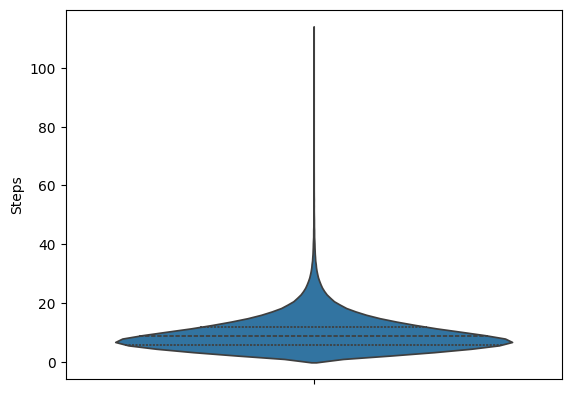

In [87]:
plt.figure()
sb.violinplot(df_g['n_steps'],inner='quartile')
plt.ylabel('Steps')

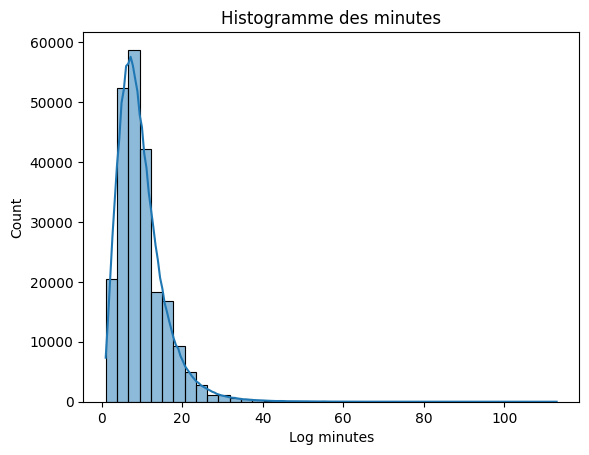

In [88]:
plt.figure()
sb.histplot(df_g['n_steps'], kde=True, bins=40)
plt.title("Histogramme des minutes")
plt.xlabel('Log minutes')
plt.show()


In [89]:
skewness_minutes = scipy.stats.skew(df_g['n_steps'])
kurt_minutes = scipy.stats.kurtosis(df_g['n_steps'])

print(f'Skewness: {skewness_minutes}')
print(f'Kurtosis: {kurt_minutes}')

Skewness: 1.9925424965312502
Kurtosis: 9.652176877936038


Toujours une présences d'outliers qui augmente les valeurs de skewness et kurtosis

Skewness > 0 : La distribution est asymétrique avec une masse importante à gauche

Kurtnosis > 3 : Valeurs très proche de la moyenne mais des outliers important

##### Colonne : *n_ingredients*

In [90]:
df_g  = df_g.sort_values('n_ingredients',ascending=False)
df_g[['name','n_ingredients','ingredients']].head(10)

,name,n_ingredients,ingredients
1272,a to z bread,43,"[sugar, vegetable oil, eggs, vanilla extract, ..."
129591,z best two faced jerk,40,"[chicken breasts, fresh lime juice, salt, pepp..."
140295,morton thompson turkey,40,"[whole turkey, canola oil, salt, fresh ground ..."
66233,kato s garage style tomato sauce meatba...,39,"[sweet onion, garlic cloves, green pepper, red..."
135862,basic fried rice with variations,38,"[brown rice, green onions, oil, soy sauce, sal..."
227651,sunday supper taco salad bowls tacos,37,"[flour tortillas, ground beef, vegetable oil, ..."
67952,land and sea white meat version of surf and turf,37,"[apricot, nectarine, red pepper, jalapeno, gar..."
28276,dhansak with brown rice,36,"[tuvar dal, masoor dal, yellow moong dal, dal,..."
92212,coconut chicken fingers with mango rum salsa,35,"[chicken breast halves, yellow onion, celery, ..."
103690,bill s calzones,35,"[tomato sauce, onions, garlic cloves, mushroom..."


In [91]:
df_g['ingredients'].iloc[0]


['sugar',
 'vegetable oil',
 'eggs',
 'vanilla extract',
 'all-purpose flour',
 'cinnamon',
 'baking powder',
 'baking soda',
 'salt',
 'walnuts',
 'apples',
 'applesauce',
 'apricots',
 'bananas',
 'carrots',
 'cherries',
 'fresh coconut',
 'dates',
 'eggplants',
 'figs',
 'seedless grapes',
 'honey',
 'lemon juice',
 'marmalade',
 'mincemeat',
 'oranges',
 'peaches',
 'of fresh mint',
 'pears',
 'crushed pineapple',
 'prune',
 'canned pumpkin',
 'raisins',
 'raspberries',
 'rhubarb',
 'fresh strawberries',
 'frozen strawberries',
 'sweet potatoes',
 'tapioca',
 'tomatoes',
 'yams',
 'yogurt',
 'zucchini']

In [92]:
df_g['steps'].iloc[0]

['in a mixing bowl , combine the sugar , oil and eggs',
 'mix well',
 'stir in a-to-z ingredients of your choice and vanilla',
 'combine flour cinnamon , baking powder , baking soda and salt',
 'stir into liquid ingredients just until moistened',
 'stir in nuts',
 'pour into two greased 8-in',
 'x 4-in',
 'x 2-in',
 'loaf pans',
 'bake at 325 f for 55-65 minutes or until a wooden pick inserted near the center comes out clean',
 'cool in pan 10 minutes before removing to a wire rack']

Il y un nombre très important d'ingrédients car la recette propose de mettre "ce qu'on veut" dans le pain préparer.
_Valeur aberrante ?_

In [93]:
df_g['steps'].iloc[1]

['day or afternoon before:',
 'mix up jerk',
 'make all three to give your family a choice of mild , spicy / hot or spicy / sweet',
 'important',
 'to mix , just combine all ingredients and blend well',
 'whisk the ones with liquid ingredients with a fork',
 'up to 4 hours ahead:',
 'marinade chicken:',
 'in a large glass baking dish , pour lime juice over chicken pieces',
 'turn to coat',
 'add a bit salt & pepper to taste',
 'coat chicken pieces on both sides with jerk of choice',
 'cover dish with plastic wrap and refrigerate for 2 to 4 hours',
 'prepare zesty salad dressing:',
 'in a blender , add yogurt , dijon mustard , cilantro , garlic , lime juice , white wine vinegar , black pepper and chopped jalapeo pepper',
 'blend until mixed well',
 'put into a jar , cover and refrigerate',
 'shake before using',
 'prepare creamy chutney dressing:',
 'combine all ingredients in a small bowl and mix well',
 'cover and refrigerate',
 'up to 2 hours ahead:',
 'soak wooden skewers at least o

Semble plus cohérent entre le nombre d'ingrédients et les étapes.

In [94]:
df_g = df_g.drop(df_g['n_steps'].idxmax())

In [95]:
df_g  = df_g.sort_values('n_ingredients',ascending=True)
df_g[['name','n_ingredients','ingredients']].head(10)

,name,n_ingredients,ingredients
88009,freezing eggs,1,[egg]
230741,apple cider reduction,1,[apple cider]
181738,easter hard boiled eggs,1,[egg]
230265,how to choose and cut a mango,1,[mango]
106932,toasted nuts,1,[walnuts]
3408,clotted cream,1,[heavy cream]
190541,homemade panko japanese bread crumbs,1,[white bread]
212436,melted sugar glue for candy houses,1,[white sugar]
158489,magic bullet powdered sugar,1,[sugar]
207501,chocolate dirt,1,[dark chocolate chips]


Text(0, 0.5, 'Ingredients')

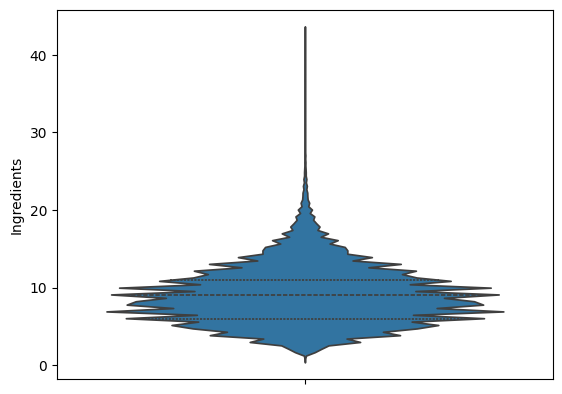

In [96]:
plt.figure()
sb.violinplot(df_g['n_ingredients'],inner='quartile')
plt.ylabel('Ingredients')

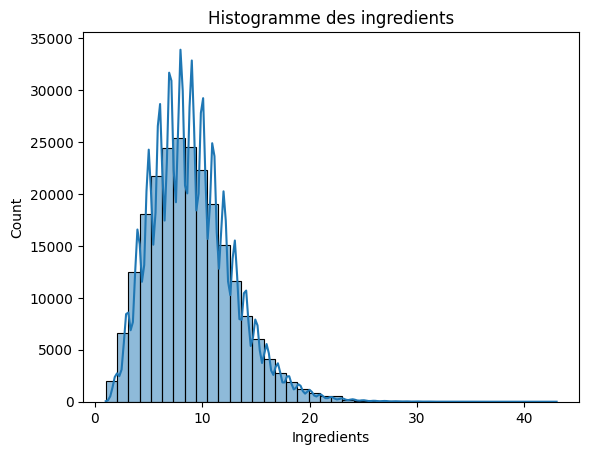

In [97]:
plt.figure()
sb.histplot(df_g['n_ingredients'], kde=True, bins=40)
plt.title("Histogramme des ingredients")
plt.xlabel('Ingredients')
plt.show()

In [98]:
skewness_minutes = scipy.stats.skew(df_g['n_ingredients'])
kurt_minutes = scipy.stats.kurtosis(df_g['n_ingredients'])

print(f'Skewness: {skewness_minutes}')
print(f'Kurtosis: {kurt_minutes}')

Skewness: 0.7709208730721936
Kurtosis: 1.1853164198947468


### Analyse de Submitted et de Date

In [99]:
df_g.head()

,recipe_id,name,minutes,contributor_id,submitted,tags,nutrition,steps,n_steps,description,ingredients,n_ingredients,review,date,user_id,rating
88009,153034,freezing eggs,35,249074,2006-01-23,"[60-minutes-or-less, time-to-make, main-ingred...","[11.9, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0]","[items needed:, eggs, ziplock bags , various s...",37,a tried & true method to have eggs in your hou...,[egg],1,"[Was looking exactly for this info, didn't thi...","[2006-05-05 00:00:00, 2006-08-03 00:00:00, 200...","[192419, 175492, 121795, 529681, 490764, 20176...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 0]"
230741,521756,apple cider reduction,155,171084,2015-04-19,"[time-to-make, course, preparation, low-protei...","[14.4, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0]","[in 6-8 quart stock pan , measure out 2 cups o...",13,i saw a post about this on facebook and gave i...,[apple cider],1,"[This was delicious! However, I have some note...",[2017-11-28 00:00:00],[606850],[5]
181738,354371,easter hard boiled eggs,12,1119236,2009-02-06,"[15-minutes-or-less, time-to-make, course, mai...","[68.9, 7.0, 0.0, 2.0, 12.0, 7.0, 0.0]",[place the eggs in a pot with enough cold salt...,9,"a gruszecki tradition and now ours, is that ea...",[egg],1,[This really works. I have an awful habbit of ...,"[2009-03-24 00:00:00, 2009-03-24 00:00:00, 200...","[537179, 705251, 166294, 400708, 1323045, 185305]","[5, 5, 5, 5, 5, 5]"
230265,516377,how to choose and cut a mango,5,2549237,2014-06-03,"[15-minutes-or-less, time-to-make, main-ingred...","[403.2, 3.0, 367.0, 0.0, 11.0, 3.0, 33.0]","[how to choose a ripe mango:, press your thumb...",20,i am often afraid of trying new produce becaus...,[mango],1,[Don't Gnaw on the Pit! I love your cutting id...,[2016-12-18 00:00:00],[592481],[0]
106932,189399,toasted nuts,7,162888,2006-10-06,"[15-minutes-or-less, time-to-make, course, pre...","[765.2, 117.0, 12.0, 0.0, 35.0, 35.0, 5.0]","[preheat oven to 350 degrees fahrenheit, sprea...",6,bring out the rich nutty flavour of your walnu...,[walnuts],1,[I appreciate finding this recipe- I did not k...,"[2006-11-30 00:00:00, 2008-08-08 00:00:00, 200...","[323389, 123897, 72489, 307313, 60992, 189280]","[4, 5, 5, 5, 5, 5]"


In [104]:
df_g['year'] = df_g['submitted'].dt.year
df_g['month'] = df_g['submitted'].dt.month
df_g['day'] = df_g['submitted'].dt.day
df_g['day_of_week'] = df_g['submitted'].dt.day_name()


In [105]:
df_g.head()

,recipe_id,name,minutes,contributor_id,submitted,tags,nutrition,steps,n_steps,description,ingredients,n_ingredients,review,date,user_id,rating,year,month,day_of_week,day
88009,153034,freezing eggs,35,249074,2006-01-23,"[60-minutes-or-less, time-to-make, main-ingred...","[11.9, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0]","[items needed:, eggs, ziplock bags , various s...",37,a tried & true method to have eggs in your hou...,[egg],1,"[Was looking exactly for this info, didn't thi...","[2006-05-05 00:00:00, 2006-08-03 00:00:00, 200...","[192419, 175492, 121795, 529681, 490764, 20176...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 0]",2006,1,Monday,23
230741,521756,apple cider reduction,155,171084,2015-04-19,"[time-to-make, course, preparation, low-protei...","[14.4, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0]","[in 6-8 quart stock pan , measure out 2 cups o...",13,i saw a post about this on facebook and gave i...,[apple cider],1,"[This was delicious! However, I have some note...",[2017-11-28 00:00:00],[606850],[5],2015,4,Sunday,19
181738,354371,easter hard boiled eggs,12,1119236,2009-02-06,"[15-minutes-or-less, time-to-make, course, mai...","[68.9, 7.0, 0.0, 2.0, 12.0, 7.0, 0.0]",[place the eggs in a pot with enough cold salt...,9,"a gruszecki tradition and now ours, is that ea...",[egg],1,[This really works. I have an awful habbit of ...,"[2009-03-24 00:00:00, 2009-03-24 00:00:00, 200...","[537179, 705251, 166294, 400708, 1323045, 185305]","[5, 5, 5, 5, 5, 5]",2009,2,Friday,6
230265,516377,how to choose and cut a mango,5,2549237,2014-06-03,"[15-minutes-or-less, time-to-make, main-ingred...","[403.2, 3.0, 367.0, 0.0, 11.0, 3.0, 33.0]","[how to choose a ripe mango:, press your thumb...",20,i am often afraid of trying new produce becaus...,[mango],1,[Don't Gnaw on the Pit! I love your cutting id...,[2016-12-18 00:00:00],[592481],[0],2014,6,Tuesday,3
106932,189399,toasted nuts,7,162888,2006-10-06,"[15-minutes-or-less, time-to-make, course, pre...","[765.2, 117.0, 12.0, 0.0, 35.0, 35.0, 5.0]","[preheat oven to 350 degrees fahrenheit, sprea...",6,bring out the rich nutty flavour of your walnu...,[walnuts],1,[I appreciate finding this recipe- I did not k...,"[2006-11-30 00:00:00, 2008-08-08 00:00:00, 200...","[323389, 123897, 72489, 307313, 60992, 189280]","[4, 5, 5, 5, 5, 5]",2006,10,Friday,6


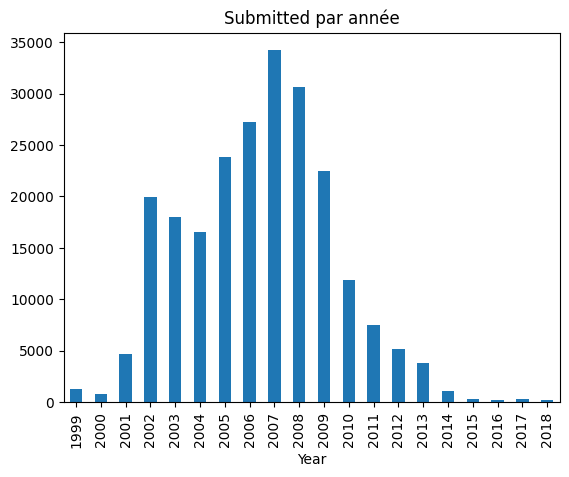

In [108]:

submissions_per_year = df_g['year'].value_counts().sort_index()

submissions_per_year.plot(kind='bar', title='Submitted par année')
plt.xlabel('Year')
plt.show()


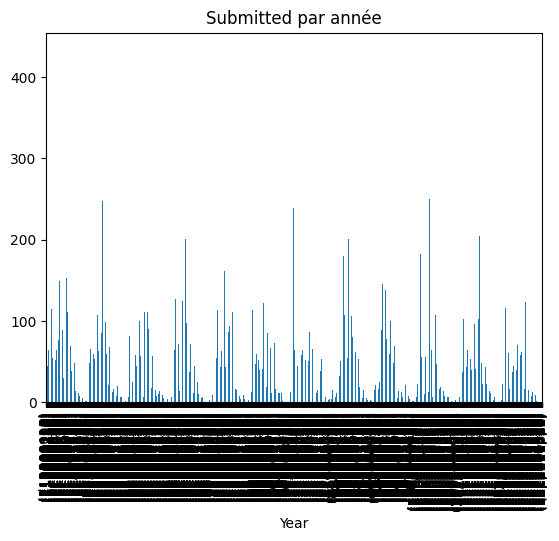

In [113]:

submissions_per_month = df_g[['month','year','day']].value_counts().sort_index()

submissions_per_month.plot(kind='bar', title='Submitted par année')
plt.xlabel('Year')
plt.show()

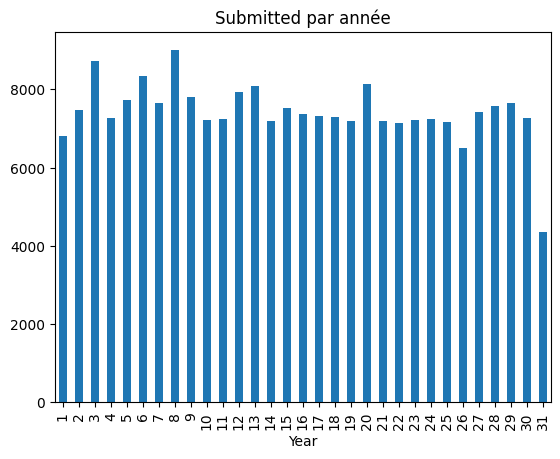

In [110]:

submissions_per_day = df_g['day'].value_counts().sort_index()

submissions_per_day.plot(kind='bar', title='Submitted par année')
plt.xlabel('Year')
plt.show()